# 4. GWR

## 4.1 GWRとは？

省略

## 4.2 Pythonモジュールを利用したGWRの実行と結果の解釈

###4.2.1 分析及び可視化の準備

In [1]:
from google.colab import drive
drive.mount('/content/mount')

Mounted at /content/mount


In [2]:
%cd '/content/mount/MyDrive/SDS/'

/content/mount/MyDrive/SDS


In [3]:
!pip install -q mgwr
!pip install -q geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.8/331.8 kB 21.8 MB/s eta 0:00:00


In [5]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import libpysal as ps  # データセット"georgia"をインポートするためのライブラリ
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

import scipy.stats as st  # 統計分布用モジュール

### 4.2.2 データのインポートと可視化

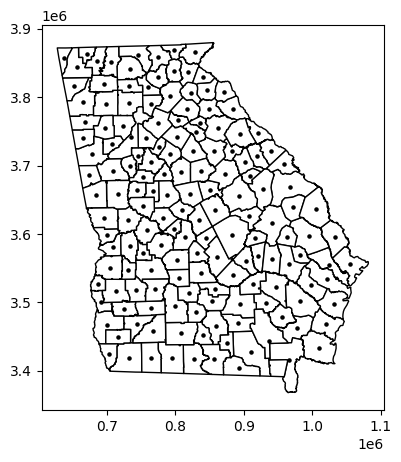

In [6]:
# サンプルデータ"georgia"をインポートしてgeopandasデータフレームを作成
georgia = gpd.read_file(ps.examples.get_path('G_utm.shp'))
# georgiaデータを図示
fig, ax = plt.subplots(figsize = (5, 5))
georgia.plot(ax=ax, **{'edgecolor': 'black', 'facecolor': 'white'})
georgia.centroid.plot(ax=ax, c ='black', markersize=5)
plt.savefig('./Chapter4/figures/georgia_shp.png')
plt.show()

In [7]:
# データフレームの確認
georgia.head()

,AREA,PERIMETER,G_UTM_,G_UTM_ID,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,Y,AreaKey,geometry
0,1.331370e+09,207205.0,132,133,31.75339,-82.28558,15744,75.6,8.2,11.43,0.64,19.9,20.76,941396.6,3521764,13001,"POLYGON ((931869.062 3545540.500, 934111.625 3..."
1,8.929300e+08,154640.0,157,158,31.29486,-82.87474,6213,100.0,6.4,11.77,1.58,26.0,26.86,895553.0,3471916,13003,"POLYGON ((867016.312 3482416.000, 884309.375 3..."
2,7.434020e+08,130431.0,148,146,31.55678,-82.45115,9566,61.7,6.6,11.11,0.27,24.1,15.42,930946.4,3502787,13005,"POLYGON ((914656.875 3512190.000, 924718.375 3..."
3,9.053950e+08,185737.0,158,155,31.33084,-84.45401,3615,100.0,9.4,13.17,0.11,24.8,51.67,745398.6,3474765,13007,"POLYGON ((744258.625 3480598.500, 765025.062 3..."
4,6.941830e+08,151347.0,76,79,33.07193,-83.25085,39530,42.7,13.3,8.64,1.43,17.5,42.39,849431.3,3665553,13009,"POLYGON ((832974.188 3677273.500, 834048.688 3..."


In [8]:
# pythonモジュールでGWRを実行するため、
# Georgiaデータセットから必要な入力項目を準備
y = georgia['PctBach'].values.reshape((-1, 1))  # 被説明変数(縦ベクトルに変形)
X = georgia[['PctFB', 'PctBlack', 'PctRural']].values  # 説明変数
u = georgia['X']  # 経度(横軸)
v = georgia['Y']  # 緯度(縦軸)
coords = list(zip(u, v))  # (経度, 緯度)のリストを作成

### 4.2.3 最適バンド幅の選択

In [9]:
# バンド幅の選択をするオブジェクトを初期化する
selector = Sel_BW(coords, y, X)
# 最適バンド幅の探索的選択
gwr_bw = selector.search()
print(gwr_bw)

117.0


### 4.2.4 GWR推定と結果表示

In [10]:
# 最適バンド幅を指定したモデルオブジェクトの作成
gwr_model = GWR(coords, y, X, gwr_bw)
# GWR推定
gwr_results = gwr_model.fit()
# 結果の表示
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                 159
Number of covariates:                                                     4

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           2315.466
Log-likelihood:                                                    -438.549
AIC:                                                                885.098
AICc:                                                               887.490
BIC:                                                               1529.786
R2:                                                                   0.548
Adj. R2:                                                              0.540

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [11]:
print(f'Rssidual sum of squares: {gwr_results.resid_ss:.3f}')
print(f'AIC: {gwr_results.aic:.3f}')
print(f'AICc: {gwr_results.aicc:.3f}')
print(f'BIC: {gwr_results.bic:.3f}')
print(f'R2: {gwr_results.R2:.3f}')
print(f'Adjusted R2: {gwr_results.adj_R2:.3f}')

Rssidual sum of squares: 1650.860
AIC: 848.915
AICc: 851.350
BIC: 888.212
R2: 0.678
Adjusted R2: 0.652


###4.2.5 ローカルな推定結果の検討

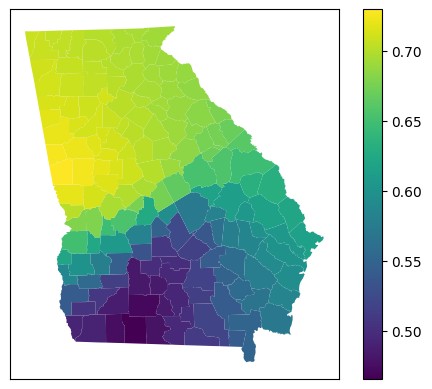

In [12]:
# ローカル決定係数のコロプレス図の作成
# geopandasデータフレームにlocalR2の列を追加
georgia['R2'] = gwr_results.localR2
# geopandasから直接".plot"による図示
georgia.plot('R2', legend = True)

ax = plt.gca()  # plt.gca()で直前に操作した軸(サブプロット)の情報を取得
ax.get_xaxis().set_visible(False)  # X軸を表示させない
ax.get_yaxis().set_visible(False)  # Y軸を表示させない
plt.savefig('./Chapter4/figures/localR2.png')  #"localR2.png"として書き出し
plt.show()

In [13]:
# 列名のリストを作成
params_name_list = ['param_Intercept', 'param_PctFB', 'param_PctBlack', 'param_PctRural']
# geopandasデータフレームに追加
georgia[params_name_list] = gwr_results.params
# データフレームの確認
georgia.head()

,AREA,PERIMETER,G_UTM_,G_UTM_ID,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,...,PctBlack,X,Y,AreaKey,geometry,R2,param_Intercept,param_PctFB,param_PctBlack,param_PctRural
0,1.331370e+09,207205.0,132,133,31.75339,-82.28558,15744,75.6,8.2,11.43,...,20.76,941396.6,3521764,13001,"POLYGON ((931869.062 3545540.500, 934111.625 3...",0.559329,14.220711,1.051618,0.018673,-0.089661
1,8.929300e+08,154640.0,157,158,31.29486,-82.87474,6213,100.0,6.4,11.77,...,26.86,895553.0,3471916,13003,"POLYGON ((867016.312 3482416.000, 884309.375 3...",0.514871,13.728796,0.760886,0.031190,-0.086669
2,7.434020e+08,130431.0,148,146,31.55678,-82.45115,9566,61.7,6.6,11.11,...,15.42,930946.4,3502787,13005,"POLYGON ((914656.875 3512190.000, 924718.375 3...",0.547518,14.108424,0.943150,0.023340,-0.089501
3,9.053950e+08,185737.0,158,155,31.33084,-84.45401,3615,100.0,9.4,13.17,...,51.67,745398.6,3474765,13007,"POLYGON ((744258.625 3480598.500, 765025.062 3...",0.506916,13.686770,0.703892,0.016728,-0.075553
4,6.941830e+08,151347.0,76,79,33.07193,-83.25085,39530,42.7,13.3,8.64,...,42.39,849431.3,3665553,13009,"POLYGON ((832974.188 3677273.500, 834048.688 3...",0.690621,13.369961,3.300706,-0.055456,-0.050647


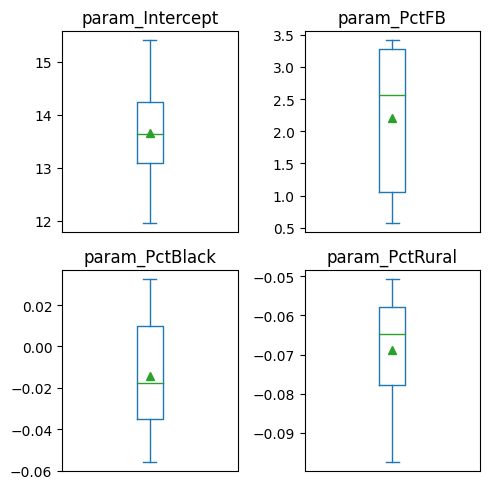

In [14]:
fig, axes = plt.subplots(2,2,figsize=(5,5))

# axes.ravel()で2次元配列のaxesを1次元配列にする
for ax, lbl in zip(axes.ravel(), params_name_list):
  georgia[lbl].plot.box(ax=ax, legend=True, showmeans=True)  # 平均は△
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(True)
  ax.set_title(lbl)

fig.tight_layout()
plt.savefig('./Chapter4/figures/boxplot.png')
plt.show()

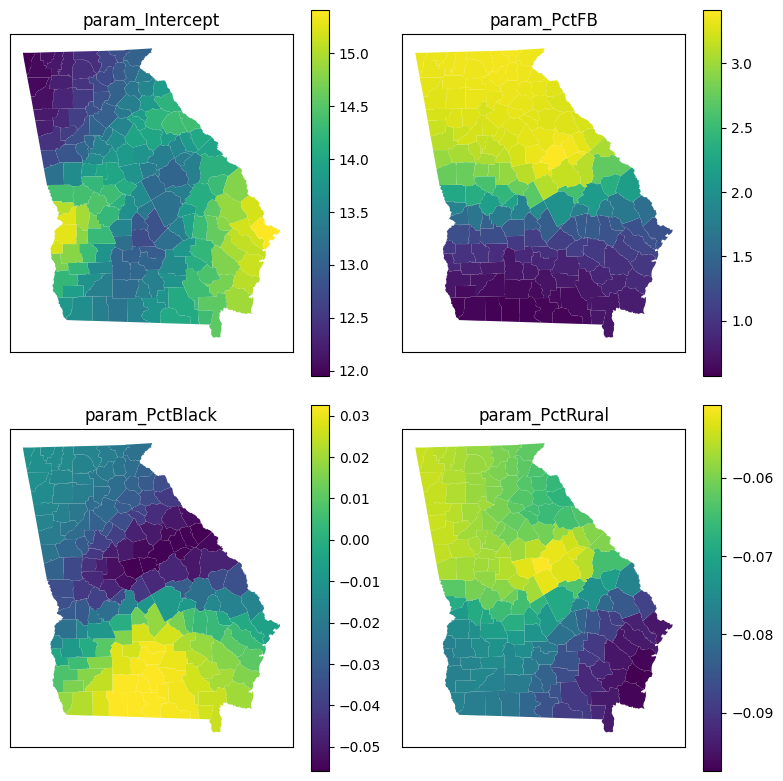

In [15]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

# axes.ravel()で2次元配列のaxesを1次元配列にする
for ax, lbl in zip(axes.ravel(), params_name_list):
  georgia.plot(lbl, ax=ax, legend=True)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(lbl)

fig.tight_layout()
plt.savefig('./Chapter4/figures/params_choropleth')
plt.show()

In [16]:
# 列名のリストを作成
name_tvalues_list = ['Intercept_t', 'PctFB_t', 'PctBlack_t', 'PctRural_t']
# geopandasデータフレームに追加
georgia[name_tvalues_list] = gwr_results.tvalues
# データフレームの確認
georgia.head()

,AREA,PERIMETER,G_UTM_,G_UTM_ID,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,...,geometry,R2,param_Intercept,param_PctFB,param_PctBlack,param_PctRural,Intercept_t,PctFB_t,PctBlack_t,PctRural_t
0,1.331370e+09,207205.0,132,133,31.75339,-82.28558,15744,75.6,8.2,11.43,...,"POLYGON ((931869.062 3545540.500, 934111.625 3...",0.559329,14.220711,1.051618,0.018673,-0.089661,7.575212,2.043092,0.650213,-5.275729
1,8.929300e+08,154640.0,157,158,31.29486,-82.87474,6213,100.0,6.4,11.77,...,"POLYGON ((867016.312 3482416.000, 884309.375 3...",0.514871,13.728796,0.760886,0.031190,-0.086669,7.867274,1.831435,1.114050,-5.394243
2,7.434020e+08,130431.0,148,146,31.55678,-82.45115,9566,61.7,6.6,11.11,...,"POLYGON ((914656.875 3512190.000, 924718.375 3...",0.547518,14.108424,0.943150,0.023340,-0.089501,7.721605,1.965412,0.826048,-5.391188
3,9.053950e+08,185737.0,158,155,31.33084,-84.45401,3615,100.0,9.4,13.17,...,"POLYGON ((744258.625 3480598.500, 765025.062 3...",0.506916,13.686770,0.703892,0.016728,-0.075553,7.289409,1.839632,0.552446,-4.320395
4,6.941830e+08,151347.0,76,79,33.07193,-83.25085,39530,42.7,13.3,8.64,...,"POLYGON ((832974.188 3677273.500, 834048.688 3...",0.690621,13.369961,3.300706,-0.055456,-0.050647,6.993196,8.464020,-2.249061,-2.736049


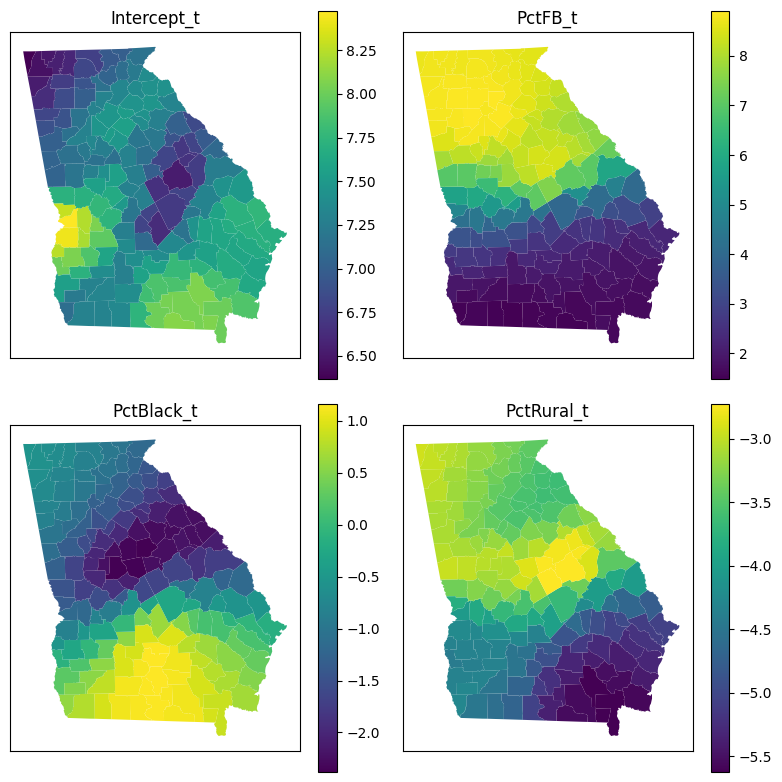

In [17]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

# axes.ravel()で2次元配列のaxesを1次元配列にする
for ax, lbl in zip(axes.ravel(), name_tvalues_list):
  georgia.plot(lbl, ax=ax, legend=True)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax.set_title(lbl)

fig.tight_layout()
plt.savefig('./Chapter4/figures/tvals_choropleth')
plt.show()

In [18]:
# 有意水準
xi = 0.05
print(f'xi : {xi}')
# データ数
N = gwr_results.n
print(f'number of observations : {N}')
# 共変量数
p = gwr_results.params.shape[1]
print(f'number of covariates : {p}')
# ENP(有効パラメータ数)
enp = gwr_results.ENP
print(f'ENP : {enp:.3f}')
# 修正alpha
alpha_c = xi/(enp/p)  # ENP:有効パラメータ数
print(f'adj,alpha(95%) : {alpha_c:.3f}')
# 修正された5％有意の臨界値をt分布から求める
tval_c = st.t.ppf(1-alpha_c/2, N-p)  # t分布の自由度は(データ数-共変量数)
print(f'adj.critical t value : {tval_c:.3f}')

xi : 0.05
number of observations : 159
number of covariates : 4
ENP : 11.805
adj,alpha(95%) : 0.017
adj.critical t value : 2.414


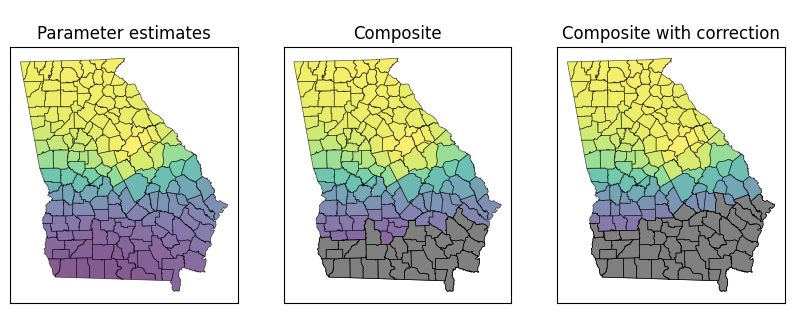

In [19]:
# 修正なしの通常のt検定に基づいたフィルタリング(臨界値を超えないと0)
filter_t = gwr_results.filter_tvals(alpha = 0.05)
# 修正ありのt検定に基づいたフィルタリング(臨界値を超えないと0)
filter_tc = gwr_results.filter_tvals()

# 図の作成
fig, axes = plt.subplots(1, 3, figsize = (10, 4))

georgia.plot('param_PctFB', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = axes[0])
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[0].set_title('Parameter estimates')

georgia.plot('param_PctFB', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = axes[1])
# 灰色部分を重ねる(filter_tの第2列がPctFBに対応している)
georgia[filter_t[:, 1] == 0].plot(color = 'grey', ax = axes[1], **{'edgecolor': 'black', 'linewidth': .5})
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[1].set_title('Composite')

georgia.plot('param_PctFB', **{'edgecolor': 'black', 'alpha': .65, 'linewidth': .5}, ax = axes[2])
# 灰色部分を重ねる(filter_tcの第2列がPctFBに対応している)
georgia[filter_tc[:, 1] == 0].plot(color = 'grey', ax = axes[2], **{'edgecolor': 'black', 'linewidth': .5})
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
axes[2].set_title('Composite with correction')

plt.savefig('./Chapter4/figures/filter_t.png')
plt.show()

###4.2.6 ローカルな多重共線性の検討

In [20]:
LCC, VIF, CN, VDP = gwr_results.local_collinearity()

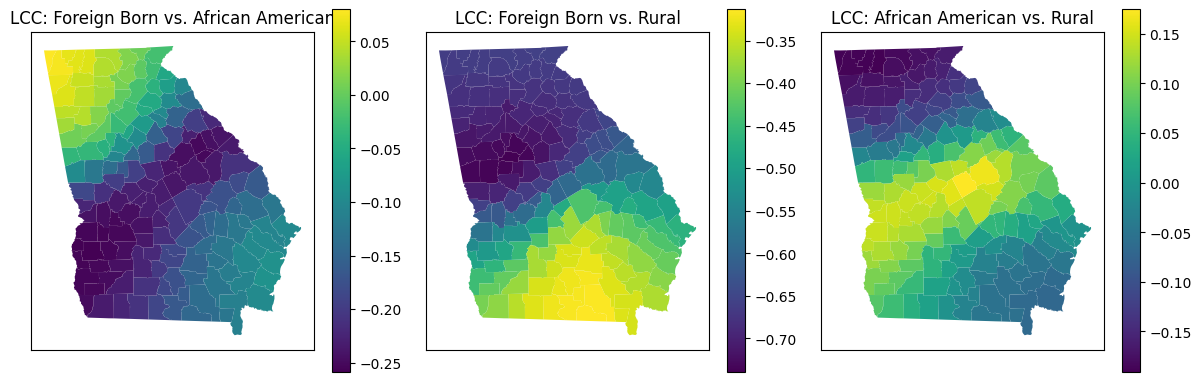

In [21]:
names = ['Foreign Born vs. African American', 'Foreign Born vs. Rural', 'African American vs. Rural']
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
for col in range(3):
  georgia['lcc'] = LCC[:, col]
  georgia.plot('lcc', ax = axes[col], legend = True)
  axes[col].set_title('LCC: ' + names[col])
  axes[col].get_xaxis().set_visible(False)
  axes[col].get_yaxis().set_visible(False)

fig.tight_layout()
plt.savefig('./Chapter4/figures/LCC.png')
plt.show()

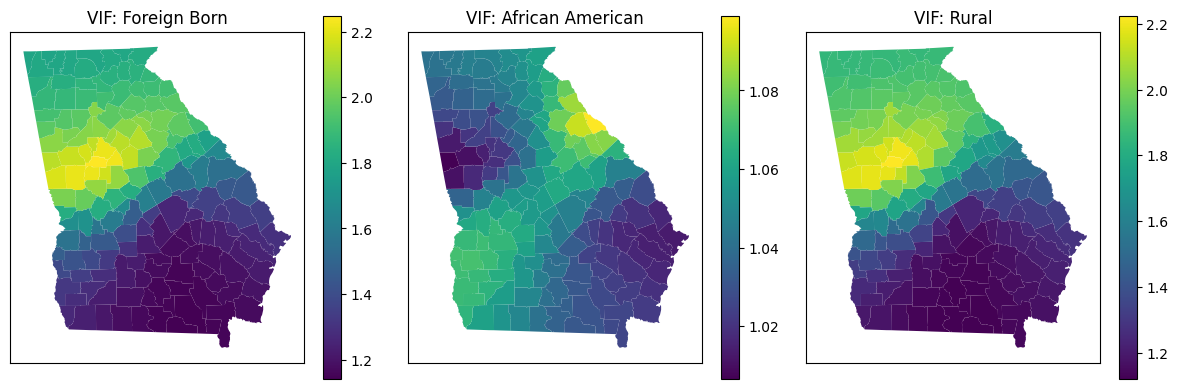

In [22]:
names = ['Foreign Born', 'African American', 'Rural']
fig, axes = plt.subplots(1, 3, figsize = (12, 4))
for col in range(3):
  georgia['vif'] = VIF[:, col]
  georgia.plot('vif', ax = axes[col], legend = True)
  axes[col].set_title('VIF: ' + names[col])
  axes[col].get_xaxis().set_visible(False)
  axes[col].get_yaxis().set_visible(False)

fig.tight_layout()
plt.savefig('./Chapter4/figures/VIF.png')
plt.show()

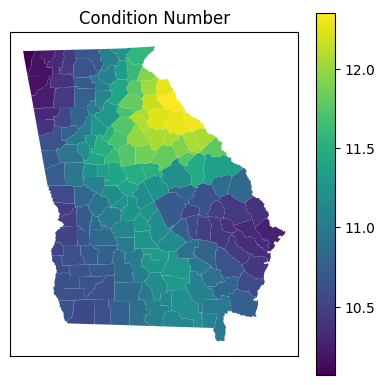

In [23]:
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
georgia['cn'] = CN
georgia.plot('cn', legend = True, ax = ax)
ax.set_title('Condition Number')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

fig.tight_layout()
plt.savefig('./Chapter4/figures/CN.png')
plt.show()

###4.2.7 Out-of-Sampleの予測

In [24]:
# GWRによるOut-of-sampleの予測

# 乱数の種の指定
np.random.seed(908)
# ランダムに10個のデータを選択
sample = np.random.choice(range(159), 10)
# 2値の要素から形成されるg_yと同じ次元配列を作成
mask = np.ones_like(y, dtype = bool).flatten()
# ランダムに選択されたsampleの番号のみFalseにする
mask[sample] = False

# 訓練用データセットの抽出
cal_coords = np.array(coords)[mask]
cal_y = y[mask]
cal_X = X[mask]

# 検証用データセットの抽出
pred_coords = np.array(coords)[~mask]
pred_y = y[~mask]
pred_X = X[~mask]

# 最適バンド幅の計算
gwr_selector = Sel_BW(cal_coords, cal_y, cal_X)
gwr_bw = gwr_selector.search(bw_min = 2)
print(f'gwr_bw : {gwr_bw}')

# GWRによるパラメータ推定
model = GWR(cal_coords, cal_y, cal_X, gwr_bw)
gwr_results = model.fit()

# 検証用データを用いた予測
pred_results = model.predict(pred_coords, pred_X)
# 既知のデータと予測されたデータの相関をチェックする
corr = np.corrcoef(pred_results.predictions.flatten(),pred_y.flatten())[0][1]
print(f'correlation between known and predicted values : {corr:.12f}')

gwr_bw : 109.0
correlation between known and predicted values : 0.914249268428
